In [27]:
# Import Dependencies
import os
import csv
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fractions import Fraction
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

csvpath = os.path.join('..', 'code_output', 'rachels_df.csv')

# Import the rachels_df.csv file as a DataFrame
df_music = pd.read_csv(csvpath, encoding="ISO-8859-1")

print(df_music.head())
print(len(df_music))

   Unnamed: 0  Number of Songs       Artist Name  Artist Location   Duration  \
0           0                1            Casual  California - LA  218.93179   
1           1                1      The Box Tops      Memphis, TN  148.03546   
2           2                1  Sonora Santanera              NaN  177.47546   
3           3                1          Adam Ant  London, England  233.40363   
4           4                1               Gob              NaN  209.60608   

              Title                              Release  Year  Danceability  \
0  I Didn't Mean To                          Fear Itself     0           0.0   
1         Soul Deep                           Dimensions  1969           0.0   
2   Amor De Cabaret  Las Numero 1 De La Sonora Santanera     0           0.0   
3   Something Girls                        Friend Or Foe  1982           0.0   
4    Face the Ashes                        Muertos Vivos  2007           0.0   

   Energy  Mode    Tempo  Loudness   H

In [2]:
df_filtered = df_music[df_music['Hotness'].notnull()]
hotness1 = df_filtered['Hotness']
indexNames = df_filtered[df_filtered['Hotness'] == 0].index
df_filtered.drop(indexNames , inplace=True)
df_filtered

C:\Users\Rachel\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
0,0,1,Casual,California - LA,218.93179,I Didn't Mean To,Fear Itself,0,0.0,0.0,0,92.198,-11.197,0.602120
4,4,1,Gob,NaN,209.60608,Face the Ashes,Muertos Vivos,2007,0.0,0.0,1,129.738,-4.501,0.604501
8,8,1,Planet P Project,NaN,269.81832,Pink World,Pink World,1984,0.0,0.0,1,86.643,-13.496,0.265861
11,11,1,Wayne Watson,"Wisner, LA",245.21098,The Urgency (LP Version),The Way Home,0,0.0,0.0,1,117.975,-7.545,0.265861
15,15,1,Blue Rodeo,"Toronto, Ontario, Canada",491.12771,Floating,Outskirts,1987,0.0,0.0,1,119.826,-8.576,0.405116
16,16,1,Richard Souther,United States,228.59710,High Tide,Cross Currents,0,0.0,0.0,1,127.756,-16.110,0.334707
18,18,1,Tesla,NaN,290.29832,Caught In A Dream,Gold,2004,0.0,0.0,1,150.062,-5.271,0.684136
22,22,1,Elena,Dubai UAE,269.58322,Setanta matins,Un cafe_ setanta matins,0,0.0,0.0,1,111.874,-8.050,0.313562
23,23,1,The Dillinger Escape Plan,"Morris Plains, NJ",207.77751,Setting Fire to Sleeping Giants,Miss Machine,2004,0.0,0.0,1,166.862,-4.264,0.666528
24,24,1,SUE THOMPSON,"Nevada, MO",124.86485,James (Hold The Ladder Steady),Sue Thompson - Her Very Best,1985,0.0,0.0,1,137.522,-12.332,0.495294


In [3]:
df_total_filtered = df_music.dropna()

indexNames = df_total_filtered[df_total_filtered['Year'] == 0].index
df_total_filtered.drop(indexNames , inplace=True)

indexNames = df_total_filtered[df_total_filtered['Hotness'] == 0].index
df_total_filtered.drop(indexNames , inplace=True)

df_total_filtered

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
15,15,1,Blue Rodeo,"Toronto, Ontario, Canada",491.12771,Floating,Outskirts,1987,0.0,0.0,1,119.826,-8.576,0.405116
23,23,1,The Dillinger Escape Plan,"Morris Plains, NJ",207.77751,Setting Fire to Sleeping Giants,Miss Machine,2004,0.0,0.0,1,166.862,-4.264,0.666528
24,24,1,SUE THOMPSON,"Nevada, MO",124.86485,James (Hold The Ladder Steady),Sue Thompson - Her Very Best,1985,0.0,0.0,1,137.522,-12.332,0.495294
30,30,1,Terry Callier,Chicago,342.56934,Do You Finally Need A Friend,Occasional Rain,1972,0.0,0.0,1,110.189,-11.939,0.413740
32,32,1,The Shangri-Las,"Queens, NY",164.80608,Twist and Shout,Best of The Shangri-Las,1964,0.0,0.0,1,130.100,-10.922,0.443291
40,40,1,Scarlet's Remains,California - LA,198.73914,Spin,The Palest Grey,2007,0.0,0.0,1,115.061,-7.469,0.450992
41,41,1,The Suicide Machines,"Detroit, MI",95.68608,Burning In The Aftermath,A Match & Some Gasoline,2003,0.0,0.0,1,115.887,-2.022,0.528782
44,44,1,Loudon Wainwright III,"Chapel Hill, NC",190.48444,Human Cannonball,Grown Man,1995,0.0,0.0,1,102.428,-15.663,0.510119
45,45,1,R.L. Burnside,"Oxford, MS",277.78567,Glory Be,A Bothered Mind,2004,0.0,0.0,1,89.984,-6.944,0.482138
50,50,1,The New York Dolls,"New York, NY",344.05832,Human Being,Too Much Too Soon,1974,0.0,0.0,1,154.953,-9.253,0.561692


In [4]:
# Use numpy to create quartiles
hotness = df_total_filtered['Hotness']

q1 = np.percentile(hotness, 25)
q3 = np.percentile(hotness,75)
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
# Calculate the interquartile range
iqr = (q3 - q1)
print("interquartile range:", iqr)
# Find lower boundary
# Q1 - 1.5 * IQR
lower_boundary = q1 - (1.5 * iqr)
print("lower boundary:", lower_boundary)
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = q3 + (1.5 * iqr)
print("upper boundary:", upper_boundary)
# Check for any lower outliers
lowcheck = hotness[hotness <= lower_boundary]
print(lowcheck)
# Check for any upper outliers
highcheck = hotness[hotness >= upper_boundary]
print(highcheck)

Q1 is 0.3603705827121406
Q3 is 0.6153722556990726
interquartile range: 0.255001672986932
lower boundary: -0.02213192676825737
upper boundary: 0.9978747651794706
Series([], Name: Hotness, dtype: float64)
Series([], Name: Hotness, dtype: float64)


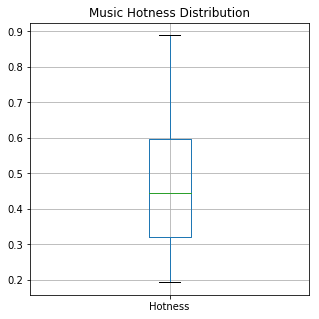

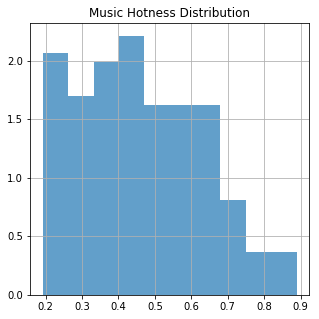

In [5]:
# Create a boxplot to compare areas
hotbox = df_filtered.boxplot("Hotness", figsize=(5, 5))
plt.title('Music Hotness Distribution')

hothist = df_filtered.hist("Hotness", density=True, alpha=.7, figsize=(5,5))
plt.title('Music Hotness Distribution')
plt.show()

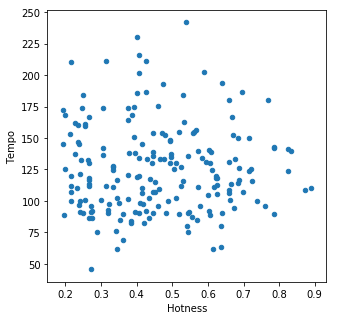

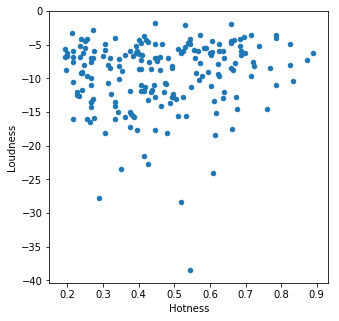

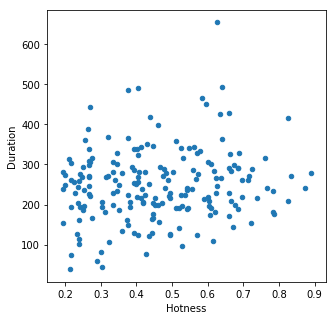

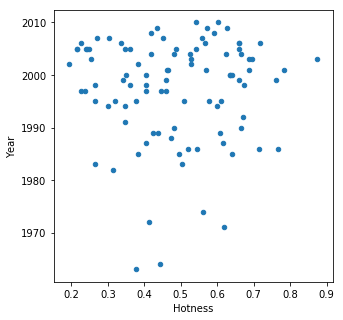

In [8]:
# Create a boxplot to compare areas
df_filtered.plot.scatter("Hotness", "Tempo", figsize=(5, 5))

df_filtered.plot.scatter("Hotness", "Loudness", figsize=(5, 5))

df_filtered.plot.scatter("Hotness", "Duration", figsize=(5, 5))

df_total_filtered.plot.scatter("Hotness", "Year", figsize=(5, 5))

In [ ]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
#target = pd.DataFrame(data.target, columns=["MEDV"])

In [17]:
## Without a constant

import statsmodels.api as sm

X = df_filtered["Tempo"]
y = df_filtered["Hotness"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hotness   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     864.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.21e-73
Time:                        19:34:52   Log-Likelihood:                 27.949
No. Observations:                 195   AIC:                            -53.90
Df Residuals:                     194   BIC:                            -50.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tempo          0.0034      0.000     29.393      0.000       0.003       0.004
==============================================================================
Omnibus:                        3.119   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.190
Skew:                          -0.060   Prob(JB):                        0.335
Kurtosis:                       2.495   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = df_filtered[["Duration", "Tempo", "Loudness"]]
y = df_filtered["Hotness"]
model = sm.OLS(y, X).fit()
redictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hotness   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     381.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.46e-80
Time:                        19:39:08   Log-Likelihood:                 51.632
No. Observations:                 195   AIC:                            -97.26
Df Residuals:                     192   BIC:                            -87.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Duration       0.0008      0.000      6.211      0.000       0.001       0.001
Tempo          0.0016      0.000      5.904      0.000       0.001       0.002
Loudness      -0.0055      0.002     -2.440      0.016      -0.010      -0.001
==============================================================================
Omnibus:                        6.173   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.327
Skew:                           0.225   Prob(JB):                        0.115
Kurtosis:                       2.425   Cond. No.                         48.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [47]:
predictions = lm.predict(X)
#lm.predict(218,92,-10)
tryme = pd.DataFrame(
    {"Duration": [200],
     "Tempo": [90],
     "Loudness": [-10]
     })

lm.predict(tryme)
predictions

array([0.45178251, 0.46510522, 0.45749464, 0.46575789, 0.52000489,
       0.43517256, 0.47927615, 0.47067967, 0.46097435, 0.42100473,
       0.4603854 , 0.47636257, 0.49617174, 0.4354358 , 0.50784975,
       0.41146632, 0.45545691, 0.44748594, 0.46098307, 0.43059597,
       0.47849651, 0.436563  , 0.47940206, 0.4576906 , 0.46437739,
       0.45448571, 0.43594329, 0.46358111, 0.46078062, 0.44506893,
       0.42406574, 0.45737418, 0.43735826, 0.46057291, 0.4752446 ,
       0.47155087, 0.44381957, 0.46260951, 0.4715652 , 0.49867881,
       0.46334966, 0.45367886, 0.43407576, 0.47430045, 0.47184652,
       0.47339097, 0.46177963, 0.43315369, 0.5044305 , 0.45985717,
       0.47478141, 0.4468543 , 0.49617537, 0.44445729, 0.45365468,
       0.48692333, 0.4361366 , 0.45280096, 0.4700412 , 0.4107801 ,
       0.46613184, 0.42368784, 0.45827722, 0.48280743, 0.42921406,
       0.45549744, 0.48401553, 0.50388597, 0.4685092 , 0.43858462,
       0.47502898, 0.45823945, 0.42078503, 0.47057845, 0.40181

In [48]:
df_filtered

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
0,0,1,Casual,California - LA,218.93179,I Didn't Mean To,Fear Itself,0,0.0,0.0,0,92.198,-11.197,0.602120
4,4,1,Gob,NaN,209.60608,Face the Ashes,Muertos Vivos,2007,0.0,0.0,1,129.738,-4.501,0.604501
8,8,1,Planet P Project,NaN,269.81832,Pink World,Pink World,1984,0.0,0.0,1,86.643,-13.496,0.265861
11,11,1,Wayne Watson,"Wisner, LA",245.21098,The Urgency (LP Version),The Way Home,0,0.0,0.0,1,117.975,-7.545,0.265861
15,15,1,Blue Rodeo,"Toronto, Ontario, Canada",491.12771,Floating,Outskirts,1987,0.0,0.0,1,119.826,-8.576,0.405116
16,16,1,Richard Souther,United States,228.59710,High Tide,Cross Currents,0,0.0,0.0,1,127.756,-16.110,0.334707
18,18,1,Tesla,NaN,290.29832,Caught In A Dream,Gold,2004,0.0,0.0,1,150.062,-5.271,0.684136
22,22,1,Elena,Dubai UAE,269.58322,Setanta matins,Un cafe_ setanta matins,0,0.0,0.0,1,111.874,-8.050,0.313562
23,23,1,The Dillinger Escape Plan,"Morris Plains, NJ",207.77751,Setting Fire to Sleeping Giants,Miss Machine,2004,0.0,0.0,1,166.862,-4.264,0.666528
24,24,1,SUE THOMPSON,"Nevada, MO",124.86485,James (Hold The Ladder Steady),Sue Thompson - Her Very Best,1985,0.0,0.0,1,137.522,-12.332,0.495294


In [60]:
df_predictions = df_filtered
df_predictions['Predicted Hotness'] = predictions
df_predictions.sort_values(['Hotness'], ascending = False)

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness,Predicted Hotness
347,347,1,Lupe Fiasco,"Chicago, IL",279.97995,Streets On Fire (Explicit Album Version),Lupe Fiasco's The Cool,0,0.0,0.0,0,110.218,-6.294,0.888814,0.478544
258,258,1,Placebo,"London, England",241.52771,English Summer Rain,Sleeping With Ghosts,2003,0.0,0.0,0,108.264,-7.255,0.873702,0.466914
42,42,1,The Rolling Stones,"London, England",271.49016,Angie (1993 Digital Remaster),Jump Back - The Best Of The Rolling Stones_ '7...,0,0.0,0.0,0,139.333,-10.358,0.834493,0.460983
138,138,1,Porcupine Tree,NaN,416.80934,Waiting,Signify (Special Edition),1997,0.0,0.0,0,124.040,-7.982,0.825174,0.503886
73,73,1,Van Halen,"Pasadena, CA",209.29261,Panama (Remastered Album Version),The Best Of Both Worlds,0,0.0,0.0,1,140.995,-4.865,0.824482,0.462610
48,48,1,Casiotone For The Painfully Alone,NaN,175.72526,Nashville Parthenon,Etiquette,2006,0.0,0.0,1,141.919,-10.930,0.785892,0.436563
442,442,1,Weezer,NaN,180.97587,Don't Let Go,The Green Album,2001,0.0,0.0,1,142.680,-3.637,0.784712,0.459445
244,244,1,Mastodon,"Atlanta, GA",233.58649,Shadows That Move,Call of the Mastodon,2001,0.0,0.0,1,89.780,-3.937,0.784195,0.477144
55,55,1,Chris Rea,"Middlesbrough, England",241.16200,Driving Home For Christmas,The Road To Hell Part 2,1986,0.0,0.0,1,180.149,-8.531,0.767728,0.454486
315,315,1,Lisa Lynne,California - LA,316.49914,Isla del Luna,Seasons Of The Soul,1999,0.0,0.0,1,95.981,-14.544,0.761303,0.464183


In [59]:
df_predictions.sort_values(['Predicted Hotness'], ascending = False)

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness,Predicted Hotness
163,163,1,Mastodon,"Atlanta, GA",654.28853,The Czar: Usurper/Escape/Martyr/Spiral (Album ...,Crack The Skye,2009,0.0,0.0,0,118.433,-5.884,0.626613,0.566374
301,301,1,JDS,NaN,465.60608,Nine Ways,Cream Trance Anthems Ibiza 2009,0,0.0,0.0,1,134.014,-5.533,0.582918,0.521421
15,15,1,Blue Rodeo,"Toronto, Ontario, Canada",491.12771,Floating,Outskirts,1987,0.0,0.0,1,119.826,-8.576,0.405116,0.520005
36,36,1,Butthole Surfers,"San Antonio, TX",450.84689,"Barking Dogs (From ""Piouhgd"")",Piouhgd + Widowermaker!,0,0.0,0.0,0,130.586,-9.063,0.593943,0.507850
161,161,1,Pearl Jam,"Seattle, WA",428.56444,Inside Job,Pearl Jam,2006,0.0,0.0,0,105.994,-8.403,0.659305,0.507525
217,217,1,Bongzilla,"Madison, Wisconsin",397.26975,Witch Weed (Live),Apogee,1999,0.0,0.0,1,95.882,-6.788,0.460541,0.506218
99,99,1,Sonny Simmons,"Sicily Island, LA",443.24526,A Distant Voice,Staying on the Watch,0,0.0,0.0,1,45.527,-13.002,0.270776,0.504431
138,138,1,Porcupine Tree,NaN,416.80934,Waiting,Signify (Special Edition),1997,0.0,0.0,0,124.040,-7.982,0.825174,0.503886
409,409,1,Public Image Ltd,"London, England",492.30322,Ease,Compact Disc,1985,0.0,0.0,1,193.560,-12.091,0.639248,0.501042
75,75,1,Nine Inch Nails,"Cleveland, OH",426.89261,Metal,Things Falling Apart,2000,0.0,0.0,0,63.017,-12.951,0.635537,0.498679
